<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 3
## Dr P. V. Johnson
## Department of Mathematics

# Last week:

- How to solve problems with code
- Demo 2.1 - Integrating a normal distribution
- Demo 2.2 - How to evaluate the efficiency of code
- Demo 2.3 - Coursework Example
- Previous class: [Lab Class - Week 2](https://github.com/pjohno/MATH60082-python/blob/main/MATH60082-lab-class-2.ipynb)
- Solutions: [Lab Class 2 Solutions](https://github.com/pjohno/MATH60082-python/blob/main/solutions/SLTN-lab-class-2.ipynb)


# This week:

- Demo 3.1 - Solving an ODE numerically
- Demo 3.2 - Accuracy of the Method
- Demo 3.3 - Plotting data
- Demo 3.4 - Coursework

# Demo 3.1: Solving an ODE

Consider an initial value ODE of the following form 
$$
\frac{dy}{dx} = f(x,y),
$$
$$
x\in[a,b] \text{ and }y(a) = \alpha
$$
write a function to return the value of y at x=b given
$$
f(x,y)=xe^{3x} - 2y,
$$
$$
a=0, \quad b=1, \text{ and }\alpha=0
$$

## Euler Method

For this example we are going to implement the Euler method as given by
$$
w_0=\alpha
$$
$$
x_i=a+ih, \text{ and }h=\frac{b-a}{n}
$$
$$
w_{i+1}=w_i + hf(x_i,w_i), \text{ for } i = 0,1,\dots,n-1
$$
where $w$ at the nth step gives an estimate for the value of $y$ at $x=b$.

# Consistency and Convergence

A quick reminder of the **consistency** and **convergence**:
\pause 
\item Given a numerical scheme 
$$
w^{i+1}=\Phi(x^i,w^i;h)
$$
to approximate the ODE, the scheme has a truncation error
$$
\delta^h_i = \Phi(x^i,y(x^i);h) -  y(x^{i+1})  .
$$
The method is said to be consistent if
$$
\lim_{h\rightarrow 0} \frac{\delta^h_i}{h}  = 0
$$
with a convergence rate of $p$ where
$$
\delta^h_i = O(h^{p+1})
$$

So what is the expected convergence rate of the Euler method?

# Coding

Think about what are the parameters and local variables in the problem.

- Parameters are a, b, n, as well as the function to be integrated
- Import the `math` library, we will need the `exp` function.



In [1]:
from math import exp

Next shall declare the external parameters first, followed by the local parameters and then initialise any values at the 
start of the algorithm.

In [2]:
# declare parameters
n=int(10)
a=float(0.0)
b=float(1.0)
alpha=float(0.0)
h=(b-a)/n
# initialise values
x=a
w=alpha

Finally we can add in the
rest of the algorithm in a
couple of lines and output
results to the screen at the
same time.

In [3]:
for i in range(0,n):
    x = a + i*h
    print(x,w)
    w = w + h*(x*exp(3*x)-2.0*w)
print("y( x =",b,") = ",w)

0.0 0.0
0.1 0.0
0.2 0.013498588075760033
0.30000000000000004 0.04724124646841821
0.4 0.11158109050944308
0.5 0.2220695493170164
0.6000000000000001 0.4017400929705164
0.7000000000000001 0.68437092224119
0.8 1.1191286316726876
0.9 1.7771570157894787
y( x = 1.0 ) =  2.7609014678701382


The output should be 
`y( x = 1.0 ) =  2.7609014678701382`. However we need to be careful here to run all the correct steps, so writing this in a function would be better. Use the parameters we identified as external as the arguments to the function and return the final value of $y(b)$, then it should look like:

In [4]:
def eulersMethod(n,a,b,alpha):
    h=(b-a)/n
    x=a
    w=alpha
    for i in range(0,n):
        x = a + i*h
        w = w + h*(x*exp(3*x)-2.0*w)
    return w

The function can now be used:

In [5]:
print("y( x =",b,") = ", eulersMethod(n,a,b,alpha) )

y( x = 1.0 ) =  2.7609014678701382


# Tasks

- Run the program and check the value with $n = 10$.
- Print out the final value for $n = 10, 20, 40, 80, ...$, what
happens?
- Calculate the difference between the results
$$
\Delta_{n,m} = w_n - w_m
$$
with $n = 10$ and $m = 20$, $n = 20$ and $m = 40$ and so on.
- Can you predict how $\Delta_{n,m}$ behaves for large $n$ and $m$?

# Demo 3.2: Accuracy of the Method

Next we want to analyse the accuracy of the method. In this case we do have an analytic solution to compare against but often 
we don't, so what can we do in that case? First, assume that if a method that converges at the rate $c$ the following holds true
$$
w_n = y(b) + \frac{A}{n^{c}} + O(n^{-(c+1)}).
$$
Then we can say that the convergence of the method is smooth if $A$ is a constant for all $n$. To make an empirical estimate of the 
convergence we take numerical estimates using $n$, $kn$ and $k^2n$ steps where $k$ is an integer.

 The ratio of differences between the estimates $R$,
written as
$$
R = \frac{w_{kn}-w_{n}}{w_{kkn}-w_{kn}},
$$
gives the resulting formula for the convergence rate
$$
c = \frac{\log(R)}{\log(k)}.
$$
Methods that demonstrate smooth convergence have two advantages, firstly once a method is shown to be convergent you know that
the scheme must be stable in some sense, and secondly that extrapolation techniques can be utilised to improve accuracy.

Now we want to run a loop over different values of n to generate a table of results showing the convergence rate. To calculate the ratio $R$ you will need to keep track of the difference between subsequent results. To do this you need to store the old version of value and difference **outside** the loop. The common way to denote these is `valueOld` and `diffOld`.

The algorithm should look a bit like this:

In [13]:
from math import log 
valueOld=1.0
diffOld=1.0
k=2
print("|   i |   n |    V_n     | dV_n/dV_kn |         c  |")
print("|-----|-----|------------|------------|------------|")
for i in range(1,15):
    n = k**i
    value = eulersMethod(n,a,b,alpha) # calculate v with n
    diff = value- valueOld # get difference from last time
    ratio = diffOld/diff # get ratio of differences
    c = log(ratio) / log(k) # estimate convergence rate
    str = f"|{i:5d}|{n:5d}|{value:12.5f}|{ratio:12.5f}|{c:12.5f}|"
    print(str) 
    diffOld = diff
    valueOld = value

|   i |   n |    V_n     | dV_n/dV_kn |         c  |
|-----|-----|------------|------------|------------|
|    1|    2|     1.12042|     8.30411|     3.05383|
|    2|    4|     2.09213|     0.12393|    -3.01243|
|    3|    8|     2.64714|     1.75081|     0.80802|
|    4|   16|     2.93241|     1.94554|     0.96017|
|    5|   32|     3.07575|     1.99021|     0.99292|
|    6|   64|     3.14744|     1.99930|     0.99949|
|    7|  128|     3.18328|     2.00067|     1.00048|
|    8|  256|     3.20119|     2.00058|     1.00042|
|    9|  512|     3.21015|     2.00035|     1.00026|
|   10| 1024|     3.21462|     2.00019|     1.00014|
|   11| 2048|     3.21686|     2.00010|     1.00007|
|   12| 4096|     3.21798|     2.00005|     1.00004|
|   13| 8192|     3.21854|     2.00003|     1.00002|
|   14|16384|     3.21882|     2.00001|     1.00001|


This shows the convergence rate tending to 1 for the Euler method, which confirms our theory. 

# Tasks

- Try implementing the RK2 method:
$$
k_1 =  f(x_i,w_i)
$$
$$
k_2 =  f(x_i+h,w_i+h\cdot  k_1)
$$
$$
w_{i+1} = w_i + 0.5\cdot h(k_1+k_2)
$$
- What is the empirical estimate for the convergence of this method?

# Demo 3.3 Plotting Data

Here we give a quick example of 

In [7]:
import matplotlib.pyplot as plt
import numpy 
from math import pi

Create some $x$ and $y$ data:

In [8]:
x = numpy.arange(0, 3*pi, 0.02*pi)  # creates an array of data x[i] = 0 + i*0.02*pi such that x_i \leq 3*pi
y = numpy.sin(x)                    # creates an array of data y[i] = sin(x[i]) same size as x

Now plot and save the figure as a PDF. Note that if you try saving the figure in another cell, it won't work because once the figure is shown you can't save it.

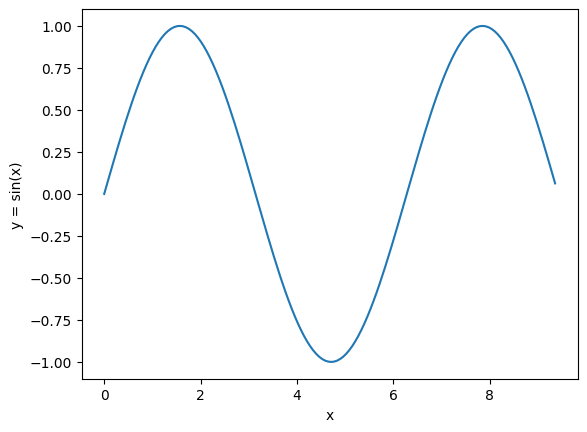

In [9]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y = sin(x)")
plt.savefig('myFigure-1.pdf', dpi=300, format='pdf', bbox_inches='tight')

Parameters here are:
- `'myFigure-1.pdf` name of the file
- `dpi=300` this gives the resolution of the outputted file. Bigger values give better quality but the file size will be larger. A value of 300 should be print quality.
- `format='pdf'` you should always use PDF rather than PNG or JPG to maintain quality of output (PDF uses vector graphics where possible)
- `bbox_inches='tight'` this cuts white space surrounding the figure, making it easier to import into your document.

# Demo 3.4: Coursework

A trader has asked you to calculate the value of an interest rate derivative contract using a non-standard model.

The value of the derivative contract $V(r,t)$ can be found by solving
$$
V(r,t)=P(r,t,T)N\big(h(r,t,T)\big)
$$
where $N$ is the cumulative standard normal distribution.  
You are given explicit functions for $P$ and $h$. They are:- 
$$
P(r,t,T) = \exp\left[\frac12 k^2(t,T) - n(r,t,T)\right], 
$$
$$
h(r,t,T) = f(r,t,T) + v^2(t,T)
$$

where  
$$
f(r,t,T) = m(r,t,T) - q(t,T), 
$$
$$
v^2(t,T) = \frac{\sigma^2}{2\kappa}(1-e^{-2\kappa(T-t)}) 
$$
$$
m(r,t,T)= e^{-\kappa(T-t)}r + (1-e^{-\kappa(T-t)})\theta,
$$
$$
n(r,t,T)= (T-t)\theta + (r-\theta)(1-e^{-\kappa(T-t)})/\kappa, 
$$
$$
k^2(t,T)= \frac{\sigma^2}{2\kappa^3}(4e^{-\kappa(T-t)} - e^{-2\kappa(T-t)} + 2\kappa(T-t) - 3),
$$
$$
q(t,T)  = \frac{\sigma^2}{2\kappa^2}(1-e^{-\kappa(T-t)})^2. 
$$

1. Write a code to find the value $V(r_0,t=0,T)$ of the financial contract.  The parameters are $r_0=0.05$, $T=1$, $\kappa=0.2$, $\theta=0.06$ and $\sigma=0.04$.
2. Using the parameters from Task 1., write a program to calculate bond price $P$ and the option price $V$ for different interest rates and plot $P$ against $r$ and $V$ against $r$ on the same figure.

# Coding

To solve this problem you are going to want to make a function to mirror the mathematical formulation. So this will mean making functions for $q$, $k^2$, $n$, $m$, $v^2$, $f$, $h$, $P$ and $V$. To make keeping track of parameters easier I have set all functions take in $\kappa$, $\theta$ and $\sigma$ as arguments, as well as $r$ (if needed) $t$ and $T$.

In [10]:
from scipy.special import ndtr as ND

def qFunc(t,T,kappa,theta,sigma):
    return 0.0

def kSquaredFunc(t,T,kappa,theta,sigma):
    return 0.0

def nFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def mFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def vSquaredFunc(t,T,kappa,theta,sigma):
    return 0.0

def fFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def hFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def PFunc(r,t,T,kappa,theta,sigma):
    return 0.0

def VFunc(r,t,T,kappa,theta,sigma):
    return 1.0

r0=0.05
t=0.0
T=1.0
kappa=0.2
theta=0.06
sigma=0.04
print(qFunc(t,T,kappa,theta,sigma))

0.0


Fill in the function definitions according to the mathematics equation given above. You should be able to start generating a result for $P$ and $V$. Once you have checked all the functions return the correct values, you can write a loop to store the values of $r_i$, $P(r_i)$ and $V(r_i)$.

In [11]:
import numpy

n=200
rMin=-0.1
rMax= 0.1
dr = (rMax-rMin)/n
# setup arrays|vectors for r, P and V
r=numpy.zeros(n+1)
P=numpy.zeros(n+1)
V=numpy.zeros(n+1)

# loop over values in the vectors
for i in range(0,n+1):
    r[i] = rMin + i*dr
    P[i] = PFunc(r[i],t,T,kappa,theta,sigma)
    V[i] = VFunc(r[i],t,T,kappa,theta,sigma)

Text(0, 0.5, 'Value of P and V')

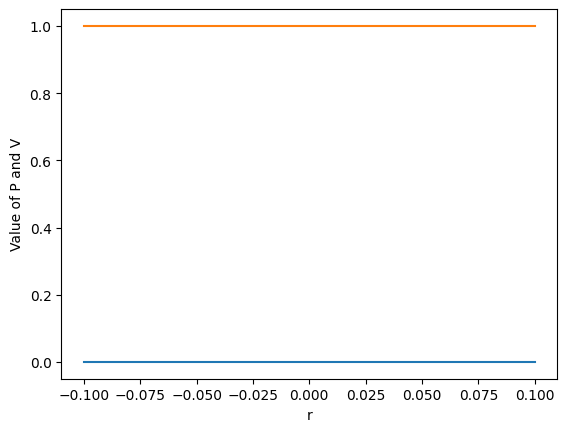

In [12]:
plt.plot(r, P)
plt.plot(r, V)
plt.xlabel("r")
plt.ylabel("Value of P and V")

After importing the figure onto latex, and giving it a label/caption, it should look something like this:

<div style='text-align: left;'>
<img src="images/lab-demo-3-3.png" alt="image" width="60%" height="auto">
</div>

# Tasks

- check that you can plot out a simple graph of $x$ vs $y$ when $y(x)=sin(x)$.
- complete the functions $q$, $k^2$, $m$, $n$, $v^2$, $f$, $P$ and $V$ to solve for the option
- edit the functions to solve the version given in your coursework, save the figure of your results, upload and complete the coursework task!

## Next steps

- Download the workbook: [MATH60082-lab-workbook-3.ipynb](https://github.com/pjohno/MATH60082-python/blob/main/MATH60082-lab-workbook-3.ipynb)
- Next class notebook: [MATH60082-lab-class-4.ipynb](https://github.com/pjohno/MATH60082-python/blob/main/MATH60082-lab-class-4.ipynb)
